This notebook summarizes my implementations and research regarding the k-means and both single- and complete-link HAC algorithms.

In [1]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tools import arff

from clustering.HAC import HACClustering
from clustering.Kmeans import KMEANSClustering

# Debugging and Evaluation

I fit several models (k-means and single- and complete-link HAC) on the dataset in file "abalone.arff" using the debug settings; their clustering performance is comparable to the scikit-learn module’s algorithm. I then fit the data from “seismic-bumps_train.arff”, including the clustering results of the three algorithms in this directory.

## Debugging: Abalone

### Prepare Data

In [3]:
mat = arff.Arff("datasets/abalone.arff",label_count=0) ## label_count = 0 because clustering is unsupervised.

raw_data = mat.data
data = raw_data

### Normalize the data ###
scaler = MinMaxScaler()
scaler.fit(data)
norm_data = scaler.transform(data)


### K-Means

In [4]:
### K-MEANS ###
KMEANS = KMEANSClustering(k=5,debug=True)
KMEANS.fit(norm_data)
KMEANS.save_clusters("reports/clustering/debug_kmeans.txt")

### HAC Single-Link

In [5]:
### HAC SINGLE-LINK ###
HAC_single = HACClustering(k=5,link_type='single')
HAC_single.fit(norm_data)
HAC_single.save_clusters("reports/clustering/debug_hac_single.txt")

### HAC Complete-Link

In [6]:
### HAC COMPLETE-LINK ###
HAC_complete = HACClustering(k=5,link_type='complete')
HAC_complete.fit(norm_data)
HAC_complete.save_clusters("reports/clustering/debug_hac_complete.txt")

## Evaluation: Seismic Bumps

In [7]:
mat = arff.Arff("datasets/seismic-bumps_train.arff",label_count=0) ## label_count = 0 because clustering is unsupervised.

raw_data = mat.data
data = raw_data

### Normalize the data ###
scaler = MinMaxScaler()
scaler.fit(data)
norm_data = scaler.transform(data)

### KMEANS ###
KMEANS = KMEANSClustering(k=5,debug=True)
KMEANS.fit(norm_data)
KMEANS.save_clusters("reports/clustering/evaluation_kmeans.txt")

### HAC SINGLE-LINK ###
HAC_single = HACClustering(k=5,link_type='single')
HAC_single.fit(norm_data)
HAC_single.save_clusters("reports/clustering/evaluation_hac_single.txt")

### HAC COMPLETE-LINK ###
HAC_complete = HACClustering(k=5,link_type='complete')
HAC_complete.fit(norm_data)
HAC_complete.save_clusters("reports/clustering/evaluation_hac_complete.txt")

# Iris Dataset

After debugging these several algorithms, I tested their performance on clustering the iris dataset across numbers of clusters. In the plots below, the data was normalized before fitting. I fit the models to the data first excluding and lastly using labels. Clustering SSE performance is similar regardless of whether labels are part of the fit data.

## Just Features Included

In [8]:
mat = arff.Arff("datasets/iris.arff",label_count=0) ## label_count = 0 because clustering is unsupervised.

raw_data = mat.data
data = raw_data[:-1] # Removing labels from data

### Normalize the data ###
scaler = MinMaxScaler()
scaler.fit(data)
norm_data = scaler.transform(data)

kmeans_sse = []
k_vals = range(2,8)
for k in k_vals:
    empty_cluster = True
    while empty_cluster: #Fit again if any cluster is empty
        KMEANS = KMEANSClustering(k=k,debug=False)
        KMEANS.fit(norm_data)
        clusters = KMEANS.report[1]
        empty_cluster = False
        for cluster in clusters:
            if len(cluster) == 0:
                empty_cluster = True
    kmeans_sse.append(sum(KMEANS.report[2]))

In [9]:
### HAC SINGLE-LINK ###
single_sse = []
k_vals = range(2,8)
for k in k_vals:
    HAC_single = HACClustering(k=k,link_type='single')
    HAC_single.fit(norm_data)
    single_sse.append(sum(HAC_single.clusters_sse))

In [10]:
### HAC COMPLETE-LINK ###
complete_sse = []
k_vals = range(2,8)
for k in k_vals:
    HAC_complete = HACClustering(k=k,link_type='complete')
    HAC_complete.fit(norm_data)
    complete_sse.append(sum(HAC_complete.clusters_sse))

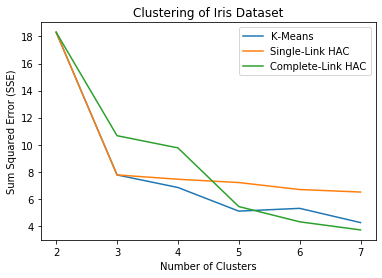

In [11]:
# Plot MSE
plt.plot(k_vals, kmeans_sse, label='K-Means')
plt.plot(k_vals, single_sse, label='Single-Link HAC')
plt.plot(k_vals, complete_sse, label='Complete-Link HAC')

plt.title('Clustering of Iris Dataset')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum Squared Error (SSE)')
plt.legend()
plt.show()

## Output Included in Features

In [12]:
raw_data = mat.data
data = raw_data # INCLUDING labels from data

### Normalize the data ###
scaler = MinMaxScaler()
scaler.fit(data)
norm_data = scaler.transform(data)

kmeans_sse = []
k_vals = range(2,8)
for k in k_vals:
    empty_cluster = True
    while empty_cluster: #Fit again if any cluster is empty
        KMEANS = KMEANSClustering(k=k,debug=False)
        KMEANS.fit(norm_data)
        clusters = KMEANS.report[1]
        empty_cluster = False
        for cluster in clusters:
            if len(cluster) == 0:
                empty_cluster = True
    kmeans_sse.append(sum(KMEANS.report[2]))

In [13]:
### HAC SINGLE-LINK ###
single_sse = []
k_vals = range(2,8)
for k in k_vals:
    HAC_single = HACClustering(k=k,link_type='single')
    HAC_single.fit(norm_data)
    single_sse.append(sum(HAC_single.clusters_sse))

In [14]:
### HAC COMPLETE-LINK ###
complete_sse = []
k_vals = range(2,8)
for k in k_vals:
    HAC_complete = HACClustering(k=k,link_type='complete')
    HAC_complete.fit(norm_data)
    complete_sse.append(sum(HAC_complete.clusters_sse))

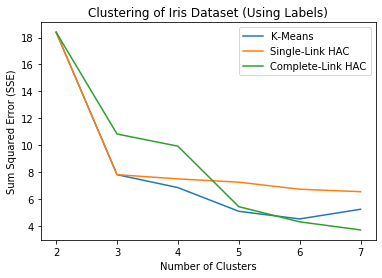

In [15]:
# Plot MSE
plt.plot(k_vals, kmeans_sse, label='K-Means')
plt.plot(k_vals, single_sse, label='Single-Link HAC')
plt.plot(k_vals, complete_sse, label='Complete-Link HAC')

plt.title('Clustering of Iris Dataset (Using Labels)')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum Squared Error (SSE)')
plt.legend()
plt.show()

## K-Means Clustering (k=4) 5 Times with Different Initial Centroids

The last analysis I ran with the iris dataset involved running the k-means algorithm on the dataset five times. Each time, I used four clusters and initialized the centroids randomly. I meant to investigate the variation in clustering performance. Consistently, the centroids settled such that two among them contained fifty observations each. Between any two k-means fittings, they shared at least one of those major centroids. Overall, though, the collective SSE was different at each run by between 0.001 and 0.5.

In [16]:
kmeans_sse = []
k = 4
for i in range(5): # Repeat 5 times
    empty_cluster = True
    while empty_cluster: #Fit again if any cluster is empty
        KMEANS = KMEANSClustering(k=k,debug=False)
        KMEANS.fit(norm_data)
        
        # Check for empty clusters
        clusters = KMEANS.report[1]
        empty_cluster = False
        for cluster in clusters:
            if len(cluster) == 0:
                empty_cluster = True
        
        # Write report for this test
        KMEANS.save_clusters('reports/clustering/report_{:d}.txt'.format(i))

# Sci-Kit Learn

## Iris Dataset

To compare the performance of Python’s sci-kit learn module algorithms with my own implementation, I fit its k-means as well as single- and complete-link HAC models to the iris dataset. All three algorithms look practically the same in SSE performance compared to my own algorithms.

In [17]:
from sklearn.cluster import AgglomerativeClustering, KMeans

mat = arff.Arff("datasets/iris.arff",label_count=0) ## label_count = 0 because clustering is unsupervised.

raw_data = mat.data
data = raw_data[:-1] # Removing labels from data

### Normalize the data ###
scaler = MinMaxScaler()
scaler.fit(data)
norm_data = scaler.transform(data)

sk_kmeans_sse = []
k_vals = range(2,8)

for k in k_vals:
    empty_cluster = True
    KMEANS = KMeans(k,n_init=1)
    KMEANS.fit(norm_data)
    sk_kmeans_sse.append(KMEANS.inertia_)

In [18]:
### HAC SINGLE-LINK ###
sk_single_sse = []
k_vals = range(2,8)
for k in k_vals:
    HAC_single = AgglomerativeClustering(k, linkage='single')
    HAC_single.fit(norm_data)
    
    sse = 0
    for i in range(k):
        points = norm_data[HAC_single.labels_==i]
        cent = np.mean(points, axis=0)
        for p in range(points.shape[0]):
            sse += np.sum( (points[p]-cent)**2 )
    sk_single_sse.append(sse)

In [19]:
### HAC COMPLETE-LINK ###
sk_complete_sse = []
k_vals = range(2,8)
for k in k_vals:
    HAC_complete = AgglomerativeClustering(k, linkage='complete')
    HAC_complete.fit(norm_data)
    
    sse = 0
    for i in range(k):
        points = norm_data[HAC_complete.labels_==i]
        cent = np.mean(points, axis=0)
        for p in range(points.shape[0]):
            sse += np.sum( (points[p]-cent)**2 )
    sk_complete_sse.append(sse)

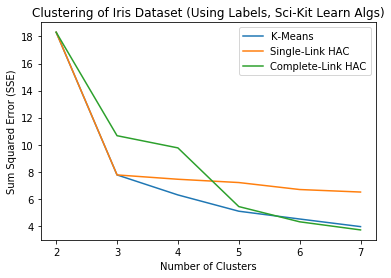

In [20]:
# Plot MSE
plt.plot(k_vals, sk_kmeans_sse, label='K-Means')
plt.plot(k_vals, sk_single_sse, label='Single-Link HAC')
plt.plot(k_vals, sk_complete_sse, label='Complete-Link HAC')

plt.title('Clustering of Iris Dataset (Using Labels, Sci-Kit Learn Algs)')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum Squared Error (SSE)')
plt.legend()
plt.show()

## Pokemon Dataset

Below is an attempt at clustering Pokémon based on their basic stats. The Pokémon types were removed to focus the clustering on the Pokémon fighting stats.

In [21]:
pokemon = pd.read_csv('datasets/Pokemon.csv')

# Keep only pokemon fight stats
data = pokemon.loc[:,'Total':'Speed']

# Scale data
scaler = MinMaxScaler()
norm_data = scaler.fit_transform(data)

### Default Values

With the default values, it is interesting to note that K-means and single-link HAC perform significantly better in reducing SSE than complete-link HAC. As expected, increasing the number of clusters leads the SSE of every method to decrease.

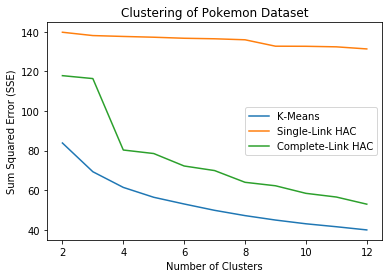

In [22]:
### KMEANS ###
sk_kmeans_sse = []
k_vals = range(2,13)
for k in k_vals:
    KMEANS = KMeans(k)
    KMEANS.fit(norm_data)
    sk_kmeans_sse.append(KMEANS.inertia_)

### HAC SINGLE-LINK ###
sk_single_sse = []
for k in k_vals:
    HAC_single = AgglomerativeClustering(k, linkage='single')
    HAC_single.fit(norm_data)
    
    sse = 0
    for i in range(k):
        points = norm_data[HAC_single.labels_==i]
        cent = np.mean(points, axis=0)
        for p in range(points.shape[0]):
            sse += np.sum( (points[p]-cent)**2 )
    sk_single_sse.append(sse)

### HAC COMPLETE-LINK ###
sk_complete_sse = []
for k in k_vals:
    HAC_complete = AgglomerativeClustering(k, linkage='complete')
    HAC_complete.fit(norm_data)
    
    sse = 0
    for i in range(k):
        points = norm_data[HAC_complete.labels_==i]
        cent = np.mean(points, axis=0)
        for p in range(points.shape[0]):
            sse += np.sum( (points[p]-cent)**2 )
    sk_complete_sse.append(sse)

# Plot MSE
plt.plot(k_vals, sk_kmeans_sse, label='K-Means')
plt.plot(k_vals, sk_single_sse, label='Single-Link HAC')
plt.plot(k_vals, sk_complete_sse, label='Complete-Link HAC')

plt.title('Clustering of Pokemon Dataset')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum Squared Error (SSE)')
plt.legend()
plt.show()

### Tweaks

I expected to see a change in K-means' performance when I tweaked several hyper-parameters (10 iterations per value of k; initializing centroids at completely random--not necessarily efficient--spots; and only stopping when the centroids do not change between iterations). Unfortunately, none of these changes significantly adjusted the shape and values of this curve across values of k. When changing the distance measurement for complete-link, though, its SSE performance more closely matched that of the K-means curve. The same change hardly altered the performance of single-link HAC.

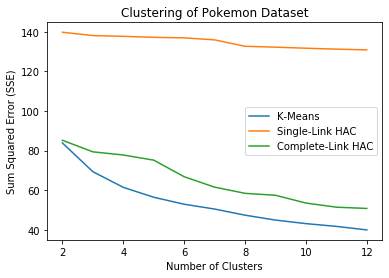

In [23]:
### KMEANS ###
sk_kmeans_sse = []
k_vals = range(2,13)
for k in k_vals:
    KMEANS = KMeans(k, init='random', n_init=10, tol=0, random_state=43)
    KMEANS.fit(norm_data)
    sk_kmeans_sse.append(KMEANS.inertia_)

### HAC SINGLE-LINK ###
sk_single_sse = []
for k in k_vals:
    HAC_single = AgglomerativeClustering(k, linkage='single', affinity='manhattan')
    HAC_single.fit(norm_data)
    
    sse = 0
    for i in range(k):
        points = norm_data[HAC_single.labels_==i]
        cent = np.mean(points, axis=0)
        for p in range(points.shape[0]):
            sse += np.sum( (points[p]-cent)**2 )
    sk_single_sse.append(sse)

### HAC COMPLETE-LINK ###
sk_complete_sse = []
for k in k_vals:
    HAC_complete = AgglomerativeClustering(k, linkage='complete', affinity='manhattan')
    HAC_complete.fit(norm_data)
    
    sse = 0
    for i in range(k):
        points = norm_data[HAC_complete.labels_==i]
        cent = np.mean(points, axis=0)
        for p in range(points.shape[0]):
            sse += np.sum( (points[p]-cent)**2 )
    sk_complete_sse.append(sse)

# Plot MSE
plt.plot(k_vals, sk_kmeans_sse, label='K-Means')
plt.plot(k_vals, sk_single_sse, label='Single-Link HAC')
plt.plot(k_vals, sk_complete_sse, label='Complete-Link HAC')

plt.title('Clustering of Pokemon Dataset')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum Squared Error (SSE)')
plt.legend()
plt.show()

### Silhouette Score

In my opinion, none of the clusterings stand out as the dominant clustering when measuring their SSE performance, because SSE biased toward cluster compactness and does not account for cluster separability. Silhouette scoring is preferable in this instance of choosing the best clustering method as well as the best number of clusters for the data because it accounts for both separability as well as compactness.

I reran my Pokémon code, this time recording and plotting the silhouette score of each algorithm across the number of clusters. It is more obvious now that clustering into two groups using single-link HAC with 2 clusters results in a better combination of separability and compactness of clusters.

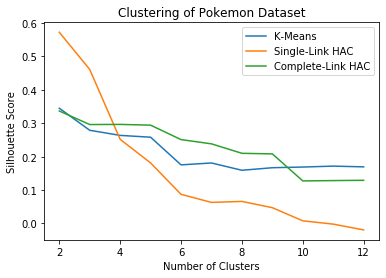

In [24]:
from sklearn.metrics import silhouette_score

### KMEANS ###
sk_kmeans_silh = []
k_vals = range(2,13)
for k in k_vals:
    KMEANS = KMeans(k, n_init=10, random_state=43)
    KMEANS.fit(norm_data)
    silh = silhouette_score(norm_data, KMEANS.labels_)
    sk_kmeans_silh.append(silh)

### HAC SINGLE-LINK ###
sk_single_silh = []
for k in k_vals:
    HAC_single = AgglomerativeClustering(k, linkage='single', affinity='manhattan')
    HAC_single.fit(norm_data)
    silh = silhouette_score(norm_data, HAC_single.labels_)
    sk_single_silh.append(silh)

### HAC COMPLETE-LINK ###
sk_complete_silh = []
for k in k_vals:
    HAC_complete = AgglomerativeClustering(k, linkage='complete', affinity='manhattan')
    HAC_complete.fit(norm_data)
    silh = silhouette_score(norm_data, HAC_complete.labels_)
    sk_complete_silh.append(silh)

# Plot MSE
plt.plot(k_vals, sk_kmeans_silh, label='K-Means')
plt.plot(k_vals, sk_single_silh, label='Single-Link HAC')
plt.plot(k_vals, sk_complete_silh, label='Complete-Link HAC')

plt.title('Clustering of Pokemon Dataset')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()